# Data Bootcamp:  Code Practice A

Optional Code Practice A to review Jupyter and graphics tools in Python. The goal here is to produce interesting graphs.  The data manipulation goes beyond what we've done; just run it and ??

This notebook written by Dave Backus for the NYU Stern course [Data Bootcamp](http://databootcamp.nyuecon.com/).  

**Warning:**  Work in progrss right now.  

## Jupyter reminders 

* We refer to the cell that's highlighted as the current cell.  Clicking on any cell will make it the current cell.   
* The + at the top creates a new cell below the current cell.  
* To run a cell, hit shift-enter or click on the run-cell icon in the toolbar at the top.  
* Change a cell from Code to Markdown (text) with the menu in the toolbar.  
* For more information, click on Help at the top.  User Interface Tour is a good place to start.

**Check.** Run the code below.  If you get an error, bring your computer by and ask for help.  If you're unusually brave, go to [StackOverflow](http://stackoverflow.com/a/19961403/804513) and read the instructions.  Then come ask for help.  (This has to do with how your computer processes unicode.  When you hear that word -- unicode -- you should run away at high speed.)    

In [2]:
# to make sure things are working, run this 
import pandas as pd
print('Pandas version: ', pd.__version__) 

Pandas version:  0.17.1


## Question 1. Setup

Import packages, arrange for graphs to display in the notebook. 

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

**Type your answers in the blank cell below.**

* What does the `pandas` package do?
* What does the `matplotlib` package do?  

## Question 2. Winner take all and the long tail the US beer industry

The internet produced some interesting market behavior, music being a great example.  Among them:  

* Winner take all.  The large producers (Beyonce, for example) took larger shares of the market than they had in the past.  
* The long tail.  At the same time, 

Curiously enough, we see the same thing in the US beer industry:   

* Scale economies and a reduction in transportation costs (the interstate highway system build in the 1950s and 60s) led to consolidation, with the large firms getting larger, and the small ones either sellingout or going bankrupt.  (How many beer brands can you think of that no longer exist?)  
* Starting in the 1980s, we saw a significant increase in the market share of small firms ("craft brewers") overall, even though each of them remains small.  

We illustrate this with data from Victor and Carol Tremblay that describe the output of the top 100 US beer producers from 1947 to 2004.  This is background data from their book, [The US Brewing Industry](http://www.amazon.com/The-US-Brewing-Industry-Economic/dp/0262512637), MIT Press, 2004.  Output is measured in thousands of 31-gallon barrels.  

**Data manipulation.** The data manipulation goes beyond what we've done in class.  You're free to ignore it, but here's the idea.  

* The spreadsheet contains output by firms ranked 1 to 100 in size.  Each row refers to a specific year and includes the outputs of firms in order of size.  We don't have their names.  
* We transpose this so that the columns are years and include output for the top-100 firms.  The row labels are the size rank of the firm.  
* We then plot the size against the rank for four years to see how it has changed.  

In [12]:
url = 'http://pages.stern.nyu.edu/~dbackus/Data/beer_production_1947-2004.xlsx'
beer = pd.read_excel(url, skiprows=12, index_col=0)

print('Dimensions:', beer.shape)
beer[list(range(1,11))].head(3)

Dimensions: (58, 115)


,1,2,3,4,5,6,7,8,9,10
YEAR,,,,,,,,,,
1947,3991,3732,3726,3609,2240,2100,1902,1652,1491,1167
1948,4865,4280,4138,4042,2443,2250,2110,1638,1376,1202
1949,4843,4673,4526,4514,2474,1927,1875,1598,1438,1436


In [20]:
vars = list(range(1,101))   # extract top 100 firms 
pdf = beer[vars].T          # transpose (flip rows and columns)
pdf[[1947, 1967, 1987, 2004]].head()

YEAR,1947,1967,1987,2004
1,3991,15535,76084,103000
2,3732,10382,39260,38560
3,3726,10124,21275,22250
4,3609,6631,16000,7450
5,2240,4917,15658,1380


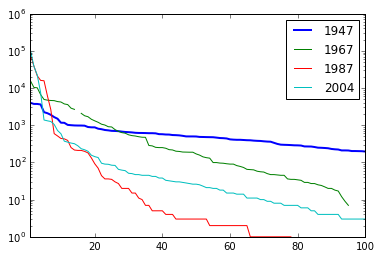

In [21]:
# a basic plot 
fig, ax = plt.subplots()

pdf[1947].plot(ax=ax, lw=2, logy=True)
pdf[1967].plot(ax=ax, logy=True)
pdf[1987].plot(ax=ax, logy=True)
pdf[2004].plot(ax=ax, logy=True)
ax.legend()

**Answer these questions below.** Code is sufficient.  

* Get help for the `set.title` method by typing `ax.set_title?` in a new cell and running it.  Note that you can open the documentation this produces in a separate window with the icon in the upper right (hover text = "Open the pager in an external window").  
* Add a title using `ax.set_title('Your title')`.  
* Change the fontsize of the title to 14.  
* What happens if we add the argument/parameter `lw=2` to the `ax.plot()` statements?  
* Add a label to the x axis with `ax.set_xlabel()`.  
* Add a label to the y axis.  
* Why did we use a log scale (`logy=True`)?  What happens if we don't?
* Use the `color` argument/parameter to choose a more effective set of colors.  

## Question 2.